# App dataset with decision trees

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
import random
random.seed(0)

In [3]:
app_dataset = pd.DataFrame({
    'Platform': ['iPhone','iPhone','Android','iPhone','Android','Android'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
app_dataset

,Platform,Age,App
0,iPhone,15,Atom Count
1,iPhone,25,Check Mate Mate
2,Android,32,Beehive Finder
3,iPhone,35,Check Mate Mate
4,Android,12,Atom Count
5,Android,14,Atom Count


# With age as a categorical feature

In [4]:
app_dataset_one_hot = pd.DataFrame(
    {'Platform_iPhone':[1,1,0,1,0,0],
     'Platform_Android':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Adult':[0,1,1,1,0,0],
     'App_Atom_Count':[1,0,0,0,1,1],
     'App_Beehive_Finder':[0,0,1,0,0,0],
     'App_Check_Mate_Mate':[0,1,0,1,0,0]})
app_dataset_one_hot

,Platform_iPhone,Platform_Android,Age_Young,Age_Adult,App_Atom_Count,App_Beehive_Finder,App_Check_Mate_Mate
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [5]:
X = app_dataset_one_hot[['Platform_iPhone','Platform_Android','Age_Adult','Age_Young']]
y = app_dataset_one_hot[['App_Atom_Count','App_Beehive_Finder','App_Check_Mate_Mate']]

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)
dt.score(X,y)

1.0

[Text(200.88000000000002, 181.2, 'X[3] <= 0.5\ngini = 0.407\nsamples = 6\nvalue = [[3, 3]\n[5, 1]\n[4, 2]]'),
 Text(133.92000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.296\nsamples = 3\nvalue = [[3, 0]\n[2, 1]\n[1, 2]]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[0, 2]]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [[0, 3]\n[3, 0]\n[3, 0]]')]

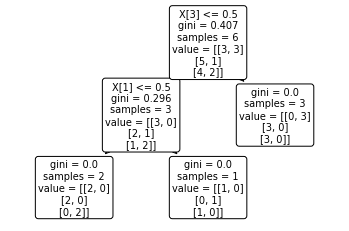

In [7]:
tree.plot_tree(dt, rounded=True)

# With age as a numerical feature

In [8]:
app_dataset = pd.DataFrame({
    'Platform_iPhone':[1,1,0,1,0,0],
    'Platform_Android':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
print(app_dataset)

   Platform_iPhone  Platform_Android  Age              App
0                1                 0   15       Atom Count
1                1                 0   25  Check Mate Mate
2                0                 1   32   Beehive Finder
3                1                 0   35  Check Mate Mate
4                0                 1   12       Atom Count
5                0                 1   14       Atom Count


In [9]:
features = app_dataset[['Age','Platform_iPhone','Platform_Android']]
print(features)

   Age  Platform_iPhone  Platform_Android
0   15                1                 0
1   25                1                 0
2   32                0                 1
3   35                1                 0
4   12                0                 1
5   14                0                 1


In [10]:
labels = app_dataset['App']
print(labels)

0         Atom Count
1    Check Mate Mate
2     Beehive Finder
3    Check Mate Mate
4         Atom Count
5         Atom Count
Name: App, dtype: object


In [11]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

1.0

[Text(133.92000000000002, 181.2, 'X[0] <= 20.0\ngini = 0.611\nsamples = 6\nvalue = [3, 1, 2]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

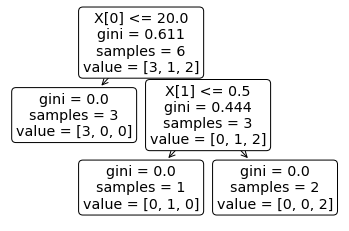

In [12]:
tree.plot_tree(app_model, rounded=True)